In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

In [20]:
# Step 1: Manually specify the directory and filenames
directory = "../data/csv_performance_all_models/"  # Replace with your directory path

filenames = ["country_auc_summary_labse_sample.csv","country_auc_summary_small_labse_sample.csv", 
             "country_auc_summary_xlmt_sample.csv"]  # List of filenames

titles = ["Global AUC Intensity - LabSE", "Global AUC Intensity - Small-LabSE", "Global AUC Intensity - XLM-T"]

# Combine directory path with filenames
file_paths = [os.path.join(directory, filename) for filename in filenames]

In [21]:
# Step 2: Read the CSV files and apply name mapping
name_mapping = {
    'Palestinian Territory': 'Palestine',
    'United States': 'United States of America'
}
dfs = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Apply the country name mapping
    df['country'] = df['country'].replace(name_mapping)
    dfs.append(df)

In [13]:
# Step 3: Load the world shapefile using GeoPandas
world = gpd.read_file("../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

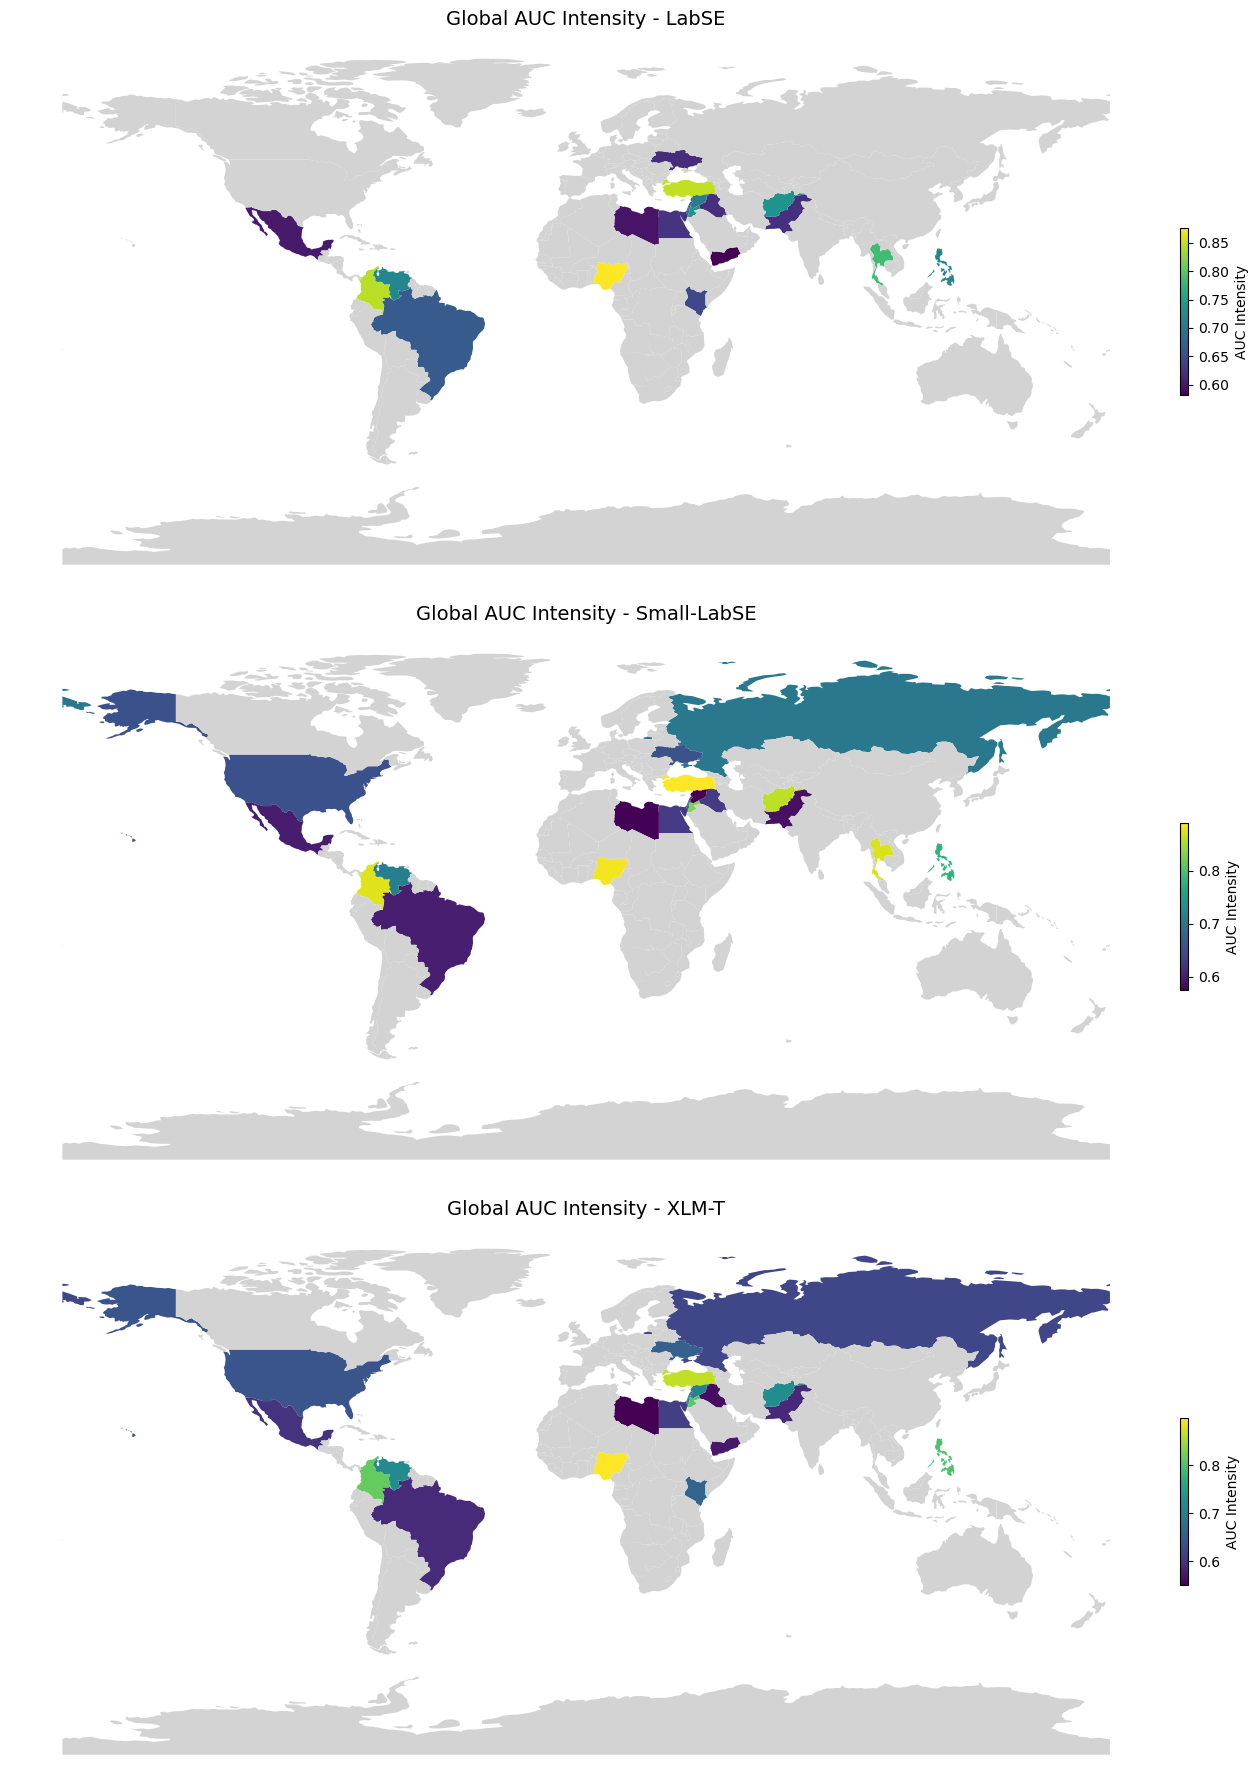

In [23]:
# Step 4: Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(18, 18), sharex=True, sharey=True)

# Step 5: Generate a heatmap for each model
for i, (df, ax, title) in enumerate(zip(dfs, axes, titles)):
    # Merge the GeoPandas world map with the current DataFrame
    merged_world = world.merge(df, how='left', left_on='NAME', right_on='country')

    # Plot the AUC heatmap
    merged_world.plot(
        column='AUC',  # Column to color by
        cmap='viridis',  # Color map (e.g., 'viridis', 'plasma', etc.)
        legend=True,  # Add a legend
        legend_kwds={
            'label': "AUC Intensity",  # Label for the color bar
            'orientation': "vertical",  # Horizontal color bar
            'shrink': 0.3,  # Scale the size of the color bar
            'pad': 0.01  # Padding between map and legend
        },
        missing_kwds={"color": "lightgrey", "label": "No Data"},
        ax=ax
    )

    # Position the color bar (legend) in the bottom-left corner of the subplot
    leg = ax.get_legend()
    if leg:
        leg.set_bbox_to_anchor((0.15, 0.05, 0.4, 0.02))  # Adjust position and size of the legend box

    # Add title for each subplot
    ax.set_title(title, fontsize=14)
    ax.set_axis_off()  # Hide axis for cleaner display

# Step 6: Adjust layout for the figure
fig.tight_layout()

In [24]:
# Step 7: Save the figure (optional)
fig.savefig("../figures/global_auc_heatmap_models_sample.jpg", format="jpg", dpi=300)

In [25]:
fig.savefig("../figures/global_auc_heatmap_models_sample.eps", format="eps")